In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [10]:
caso = pd.read_excel('Caso.xlsx')

si un cliente realizará una compra en función de sus ingresos. Utilizaremos la regresión logística binaria para clasificar a los clientes como compradores activos (Compra = 1) o pasivos (Compra = 0).

In [11]:
caso.head()

,Compra,Ingresos
0,1,50.2
1,1,70.3
2,1,62.9
3,1,48.5
4,1,57.2


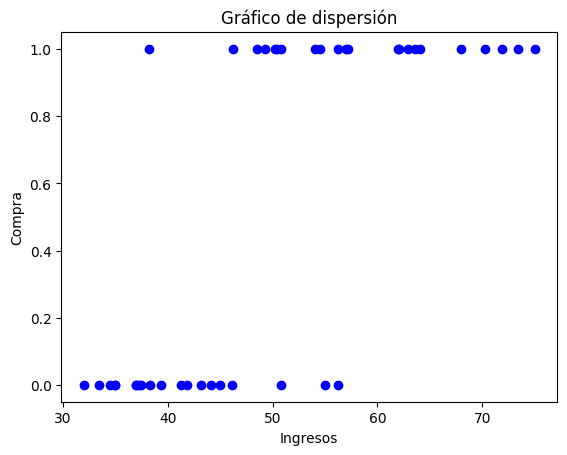

In [13]:
# Gráfico de dispersión
plt.scatter(caso['Ingresos'], caso['Compra'], color='blue')
plt.title('Gráfico de dispersión')
plt.xlabel('Ingresos')
plt.ylabel('Compra')
plt.show()

<ipython-input-14-0fb62a74b7ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Compra', y='Ingresos', data=caso, palette='Greens')


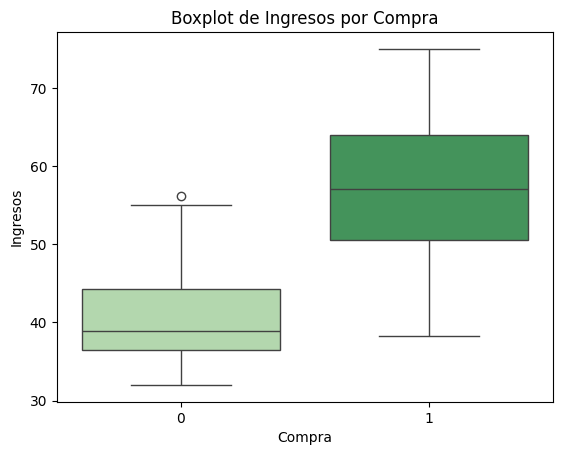

In [14]:
# Boxplot
sns.boxplot(x='Compra', y='Ingresos', data=caso, palette='Greens')
plt.title('Boxplot de Ingresos por Compra')
plt.show()

In [15]:
# Tabla de frecuencias de la variable dependiente
frecuencia_compra = caso['Compra'].value_counts()
frecuencia_compra

,count
Compra,
1,22
0,20


Hay 22 observaciones donde se realizó una compra (Compra = 1) y 20 donde no se realizó (Compra = 0).

In [16]:
# 2. Estimación del modelo

# Añadir constante para la intersección en el modelo
X = sm.add_constant(caso['Ingresos'])
y = caso['Compra']

# Ajustar el modelo de regresión logística
modelo = sm.Logit(y, X).fit()
modelo_summary = modelo.summary()

# Odds ratio
odds_ratios = np.exp(modelo.params)

# Ejemplo de predicción con ingresos de 51 unidades
x_new = np.array([1, 51])
probabilidad_compra = np.exp(np.dot(x_new, modelo.params)) / (1 + np.exp(np.dot(x_new, modelo.params)))

modelo_summary, odds_ratios, probabilidad_compra

Optimization terminated successfully.
         Current function value: 0.342110
         Iterations 7


(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:                 Compra   No. Observations:                   42
 Model:                          Logit   Df Residuals:                       40
 Method:                           MLE   Df Model:                            1
 Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.5056
 Time:                        18:44:27   Log-Likelihood:                -14.369
 converged:                       True   LL-Null:                       -29.065
 Covariance Type:            nonrobust   LLR p-value:                 5.913e-08
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const        -11.4492      3.380     -3.388      0.001     -18.073      -4.825
 Ingresos       0.2371      0.070      3.399      0.001       0.100   

La constante (const) tiene un coeficiente de
−11.4492 con un valor p muy significativo (
𝑝
<
0.01), lo que indica que es estadísticamente significativa.

El Odds Ratio para Ingresos es
1.2676, indicando que por cada unidad adicional de ingresos, las probabilidades de que ocurra una compra aumentan en un 26.76%.


La probabilidad de compra para un ingreso de 51 unidades es aproximadamente
65.6%.

In [19]:
# 3. Evaluación del modelo

# 3.1 Forma clásica

# Predicciones
estim = modelo.predict(X)

# Punto de corte 0.5
cla1 = (estim > 0.5).astype(int)
mc1 = confusion_matrix(y, cla1)
precision_0_5 = accuracy_score(y, cla1) * 100
precision_0_5

88.09523809523809

La precisión obtenida con un punto de corte de 0.5 (precision_0_5) que es de 88.1% indica que el modelo tiene un buen rendimiento en términos de clasificar correctamente las observaciones en el conjunto de datos. Esta métrica sugiere que el 88.1% de las predicciones realizadas por el modelo coinciden con los valores reales de la variable Compra.

In [22]:
# 3.2 Validación Cruzada

# Dividir los datos en conjuntos de entrenamiento y prueba
train_set, test_set = train_test_split(caso, test_size=0.2, random_state=555)

# Ajustar el modelo en el conjunto de entrenamiento
X_train = sm.add_constant(train_set['Ingresos'])
y_train = train_set['Compra']
modelo1 = sm.Logit(y_train, X_train).fit()

# Predicciones en el conjunto de prueba
X_test = sm.add_constant(test_set['Ingresos'])
prob = modelo1.predict(X_test)
yes = (prob > 0.5).astype(int)

# Matriz de confusión y precisión en el conjunto de prueba
mc3 = confusion_matrix(test_set['Compra'], yes)
precision_validacion = accuracy_score(test_set['Compra'], yes) * 100

(mc1, precision_0_5)

Optimization terminated successfully.
         Current function value: 0.351245
         Iterations 7


(array([[17,  3],
        [ 2, 20]]),
 88.09523809523809)

Precisión: 88.1%

Esto significa que el modelo clasifica correctamente el 88.1% de las observaciones con un punto de corte de 0.5. Tiene 3 falsos positivos y 2 falsos negativos.

In [24]:

(mc3, precision_validacion)

(array([[1, 1],
        [1, 6]]),
 77.77777777777779)

Validación Cruzada:

Precisión: 77.8%

La validación cruzada muestra una precisión del 77.8%, lo que es razonablemente cercano a la precisión obtenida con el punto de corte de 0.7 en el conjunto completo.

podemos predecir si una persona con un ingreso de 51 unidades realizará una compra.

In [32]:
# Especificar el valor de ingreso para la predicción
ingreso = 51

# Crear el array de entrada para el modelo (incluyendo la constante)
x_nuevo = np.array([1, ingreso])

# Calcular la probabilidad de compra
probabilidad_compra = np.exp(np.dot(x_nuevo, modelo.params)) / (1 + np.exp(np.dot(x_nuevo, modelo.params)))

print(f"La probabilidad de compra para un ingreso de {ingreso} es: {probabilidad_compra:.4f}")


La probabilidad de compra para un ingreso de 51 es: 0.6559
